## Problem Statement
Given is the ‘Portugal Bank Marketing’ dataset:\
we need to classify whether customer is subscribed to term diposit or not.


bank client data:

1) age (numeric)

2) job: type of

job(categorical:"admin.","bluecollar","entrepreneur","housemaid","management","retired","selfemployed",
"services","student","technician","unemployed","unknown")

3) marital: marital status (categorical: "divorced","married","single","unknown"; note: "divorced"
means divorced or widowed)

4) education: education of individual (categorical:

"basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","u
nknown")

5) default: has credit in default? (categorical: "no","yes","unknown")

6) housing: has housing loan? (categorical: "no","yes","unknown")

7) loan: has personal loan? (categorical: "no","yes","unknown")

Related with the last contact of the current campaign:

8) contact: contact communication type (categorical: "cellular","telephone")

9) month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")

10) dayofweek: last contact day of the week (categorical: "mon","tue","wed","thu","fri")

11) duration: last contact duration, in seconds (numeric). Important note: this attribute highly 
affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call 
is performed. Also, after the end of the call y is obviously known. Thus, this input should only be 
included for benchmark purposes and should be discarded if the intention is to have a realistic 
predictive model.

Other attributes:

12) campaign: number of contacts performed during this campaign and for this client (numeric, 
includes last contact)

13) pdays: number of days that passed by after the client was last contacted from a previous 
campaign (numeric; 999 means client was not previously contacted)

14) previous: number of contacts performed before this campaign and for this client (numeric)

15) poutcome: outcome of the previous marketing campaign (categorical: 
"failure","nonexistent","success")

Social and economic context attributes

16) emp.var.rate: employment variation rate - quarterly indicator (numeric)

17) cons.price.idx: consumer price index - monthly indicator (numeric)

18) cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19) concavepoints_se: standard error for number of concave portions of the contour

20) euribor3m: euribor 3 month rate - daily indicator (numeric)

21) nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):

22) y: has the client subscribed a term deposit? (binary: "yes","no")

In [164]:
#Import libraries to start work
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [165]:
#Read the data
dftrain=pd.read_csv("C:\\Users\\santosh\\Desktop\\bank.csv",delimiter=";")

In [166]:
pd.set_option("display.max_columns",21)

In [167]:
dftrain.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [168]:
dftrain.shape

(41188, 21)

In [169]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [170]:
# Divide the data into numerical ("quancol") and categorical ("catcol") features
quancol = list( dftrain.loc[:,dftrain.dtypes != 'object'].columns.values )
catcol = list( dftrain.loc[:,dftrain.dtypes == 'object'].drop('y',axis=1).columns.values )

In [171]:
y_train=dftrain['y']

In [172]:
y_train.head()

0    no
1    no
2    no
3    no
4    no
Name: y, dtype: object

## Primary Analysis of categorical features

In [173]:
catcol

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [174]:
#Print value_counts of different categorical columns

In [175]:
for col in dftrain[catcol].columns:
    print(dftrain[col].value_counts())

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
no         32588
unknown     8597
yes            3
Name: default, dtype: int64
yes        21576
no         18622
unknown      990
Name: housing, dtype: int64
no         33950
yes         6248
unknown      990
Name: loan, dtype: int64
cellular     26144
telephone    15044
Name: contact, dtype: int64
may    13769
jul     7174
aug     6178

For analysing categorical columns relationship with our depedent variable stacked bar chart is good idea.

In [176]:
def vaccination_rate_plot(col, target, data, ax=None):
    """Stacked bar chart of vaccination rate for `target` against 
    `col`. 
    
    Args:
        col (string): column name of feature variable
        target (string): column name of target variable
        data (pandas DataFrame): dataframe that contains columns 
            `col` and `target`
        ax (matplotlib axes object, optional): matplotlib axes 
            object to attach plot to
    """
    counts = (dftrain[[target, col]]
                  .groupby([target, col])
                  .size()
                  .unstack(target)
             )
    group_counts = counts.sum(axis='columns')
    props = counts.div(group_counts, axis='index')

    props.plot(kind="barh", stacked=True, ax=ax)
    ax.invert_yaxis()
    ax.legend().remove()

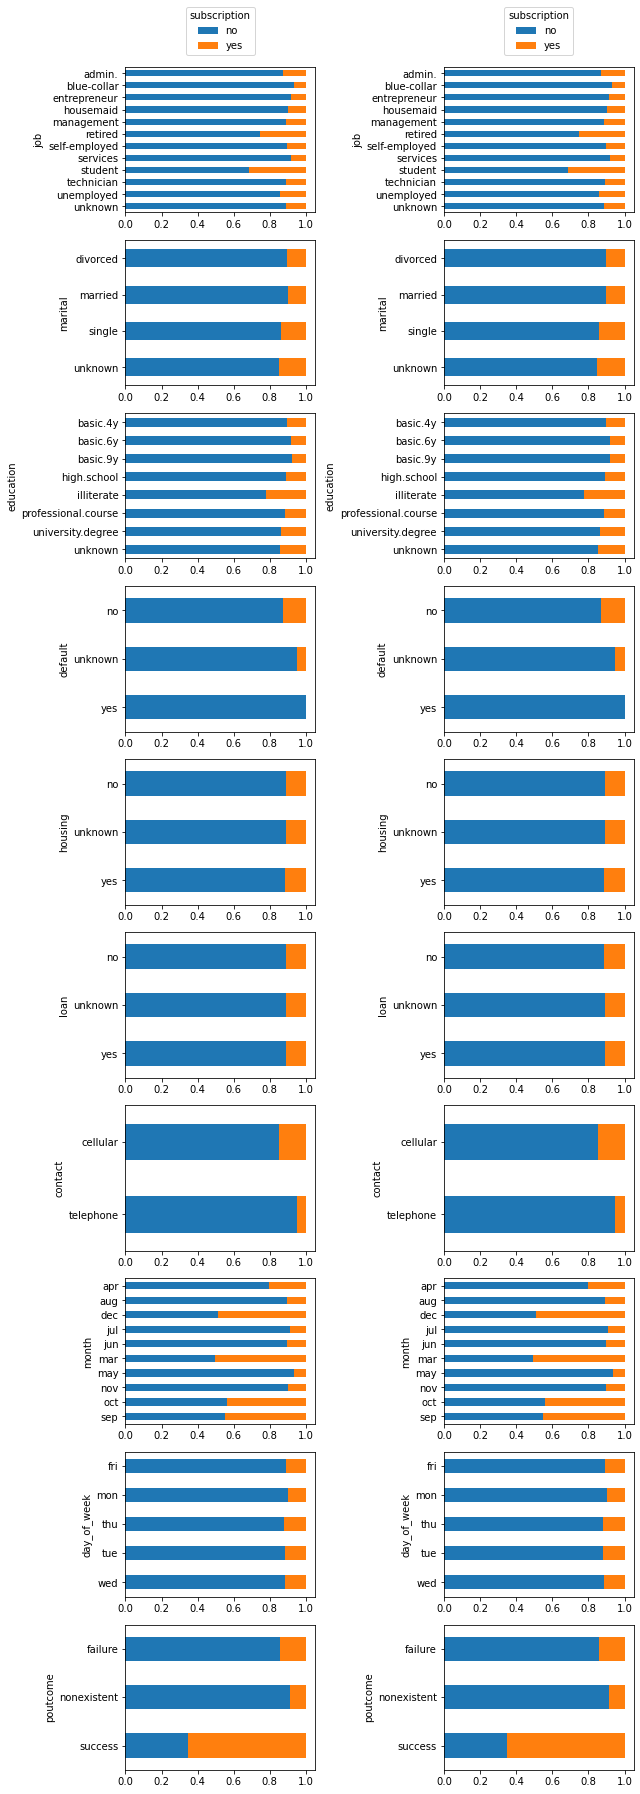

In [177]:
cols_to_plot = catcol

fig, ax = plt.subplots(len(cols_to_plot), 2, figsize=(9,len(cols_to_plot)*2.5))
for idx, col in enumerate(cols_to_plot):
    vaccination_rate_plot(col, 'y', dftrain, ax=ax[idx, 0])
    vaccination_rate_plot(col, 'y', dftrain, ax=ax[idx, 1])
    
ax[0, 0].legend(loc='lower center', bbox_to_anchor=(0.5, 1.05), title='subscription')
ax[0, 1].legend(loc='lower center', bbox_to_anchor=(0.5, 1.05), title='subscription')
fig.tight_layout()

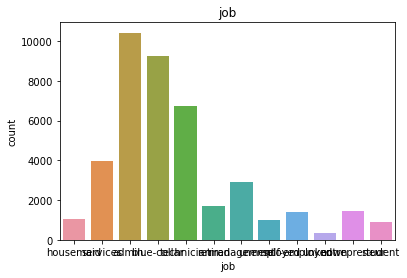

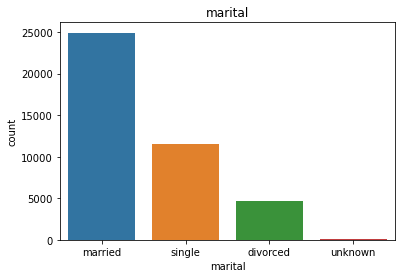

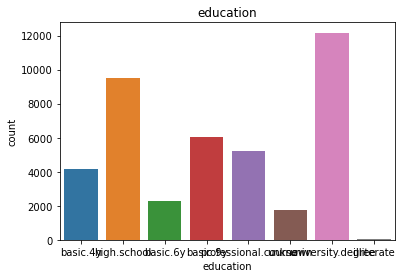

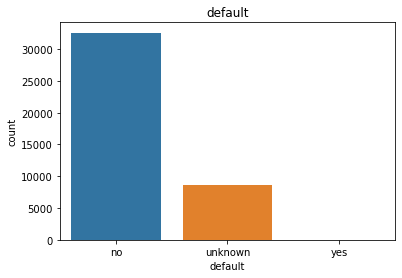

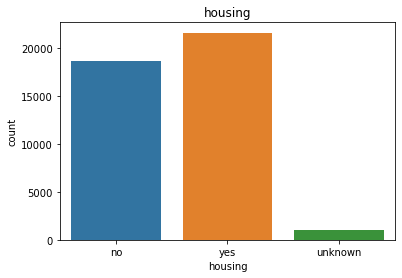

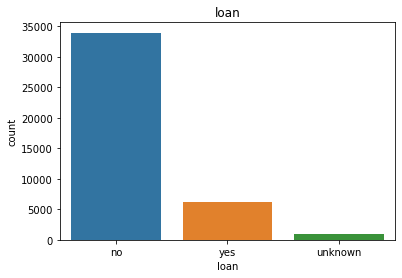

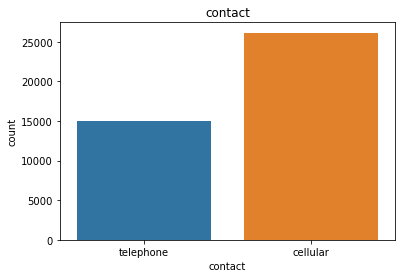

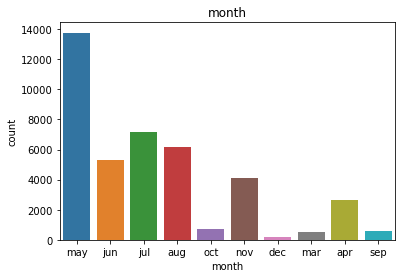

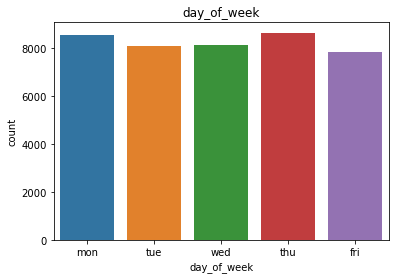

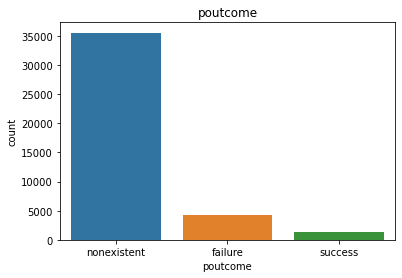

In [178]:
#Plot countplot for different categorical features
for col in catcol:
    sns.countplot(dftrain[col])
    plt.title(col)
    plt.show()


## Missing Value Analyisis

In [179]:
#store missing values in a list
missing_col=['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan']

In [180]:
missing_df=dftrain[missing_col]

In [181]:
for feature in missing_df.columns:
    missing_df[feature]=np.where(missing_df[feature]=="unknown", 1,0)

In [182]:
missing_df.head()

,job,marital,education,default,housing,loan
0,0,0,0,0,0,0
1,0,0,0,1,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


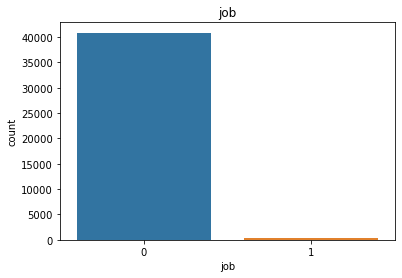

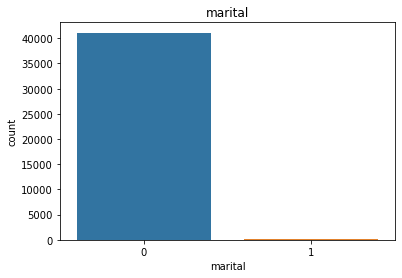

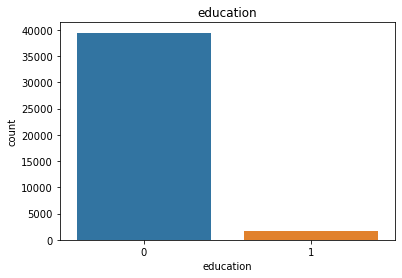

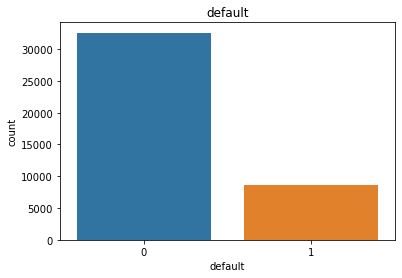

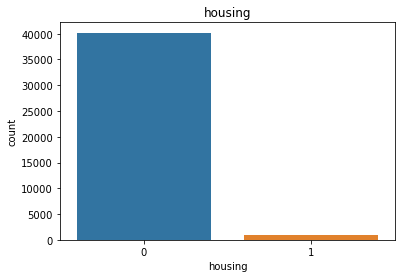

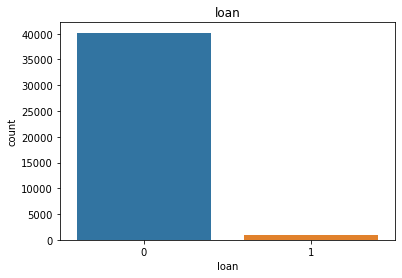

In [183]:
#Plot counts of missing values & filled values
for col in missing_col:
    sns.countplot(missing_df[col])
    plt.title(col)
    plt.show()
#The proportion of missing values are very less so i'm keeping missing values as unknown

## One Hot Encoding

In [184]:
#Creating dummy columns for categorical features
x_train=dftrain.drop("y",axis=1)

In [185]:
x_train=pd.get_dummies(x_train,columns=catcol,drop_first=True)

In [186]:
y_train[:5]

0    no
1    no
2    no
3    no
4    no
Name: y, dtype: object

## Scaling Numerical Features

In [187]:
#Scale numerical features with min-max scaler
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
x_train[quancol]=mm.fit_transform(x_train[quancol])

## Feature Selecttion using RandomForestClassifier

In [188]:
#Selecting features using Random Forest Classifier

In [189]:
from sklearn.ensemble import RandomForestClassifier

In [190]:
from sklearn.preprocessing import LabelEncoder

In [191]:
le=LabelEncoder()
y_train=le.fit_transform(y_train)

In [192]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [193]:
imp = pd.DataFrame(rf.feature_importances_ ,columns = ['Importance'],index = x_train.columns)
imp = imp.sort_values(['Importance'], ascending = False)
#Print feature_iportances in acending order
print(imp)

                                 Importance
duration                       3.010541e-01
euribor3m                      1.006626e-01
age                            8.623148e-02
campaign                       4.297478e-02
nr.employed                    4.178502e-02
pdays                          3.477541e-02
cons.conf.idx                  2.902664e-02
emp.var.rate                   2.728590e-02
cons.price.idx                 2.384434e-02
poutcome_success               2.234029e-02
housing_yes                    1.988658e-02
previous                       1.323359e-02
marital_married                1.312868e-02
loan_yes                       1.306202e-02
education_university.degree    1.285851e-02
marital_single                 1.168852e-02
day_of_week_thu                1.163417e-02
day_of_week_wed                1.146459e-02
education_high.school          1.143867e-02
day_of_week_mon                1.133859e-02
day_of_week_tue                1.115269e-02
job_technician                 1

<AxesSubplot:>

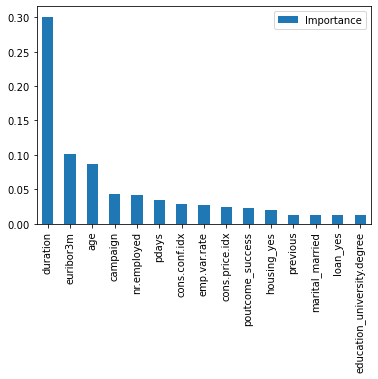

In [194]:
#PLot feature importances with barchart
imp[:15].plot(kind="bar")

#RFECV only selecting one feature so i just manually selecting the features by it's importances\
from sklearn.feature_selection import RFECV

estimator = RandomForestClassifier()
selector = RFECV(estimator, cv = 3, n_jobs = -1, scoring ="roc_auc")
selector = selector.fit(x_train, y_train)

print("The number of selected features is: {}".format(selector.n_features_))

features_kept = x_train.columns.values[selector.support_] 
x_train = x_train[features_kept]

In [195]:
x_train=x_train[imp[:30].index]

## Smote

In [196]:
#Using Smote over sampling balncing the dataset
from imblearn.over_sampling import SMOTE
sm=SMOTE()

In [197]:
x_train,y_train=sm.fit_resample(x_train,y_train)

## Model Building

In [198]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB,GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

In [199]:
from sklearn.model_selection import train_test_split

In [200]:
from sklearn.metrics import roc_auc_score,plot_roc_curve,plot_confusion_matrix,confusion_matrix,f1_score,precision_score,recall_score,classification_report

In [201]:
x_train,x_test,y_train,y_test=train_test_split(x_train,y_train,random_state=101,test_size=0.3)

In [202]:
x_train.shape,x_test.shape

((51167, 30), (21929, 30))

### Logistic Regression

In [203]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [204]:
lr.score(x_train,y_train)

0.8819160787226142

In [205]:
lr_pred=lr.predict(x_test)

In [206]:
confusion_matrix(lr_pred,y_test)

array([[9414, 1181],
       [1515, 9819]], dtype=int64)

In [207]:
print(classification_report(lr_pred,y_test))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87     10595
           1       0.89      0.87      0.88     11334

    accuracy                           0.88     21929
   macro avg       0.88      0.88      0.88     21929
weighted avg       0.88      0.88      0.88     21929



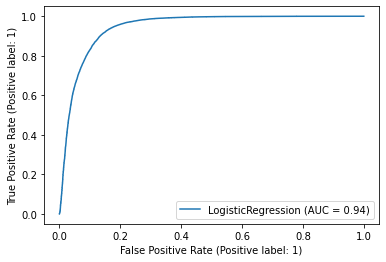

In [208]:
plot_roc_curve(lr,x_train,y_train);

### Naive Bayes

In [209]:
nb=GaussianNB()
nb.fit(x_train,y_train)
nb.score(x_train,y_train)

0.7678386460023062

In [210]:
nb_pred=nb.predict(x_test)

In [211]:
confusion_matrix(nb_pred,y_test)

array([[9118, 3355],
       [1811, 7645]], dtype=int64)

In [212]:
print(classification_report(nb_pred,y_test))

              precision    recall  f1-score   support

           0       0.83      0.73      0.78     12473
           1       0.69      0.81      0.75      9456

    accuracy                           0.76     21929
   macro avg       0.76      0.77      0.76     21929
weighted avg       0.77      0.76      0.77     21929



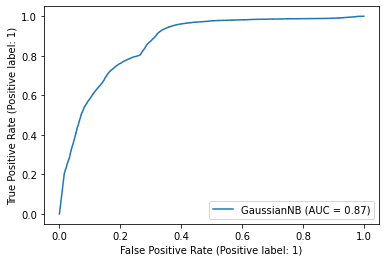

In [149]:
plot_roc_curve(nb,x_train,y_train);

### KNN

In [213]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [214]:
knn_pred=knn.predict(x_test)

In [215]:
confusion_matrix(knn_pred,y_test)

array([[ 9276,   591],
       [ 1653, 10409]], dtype=int64)

In [216]:
print(classification_report(knn_pred,y_test))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89      9867
           1       0.95      0.86      0.90     12062

    accuracy                           0.90     21929
   macro avg       0.90      0.90      0.90     21929
weighted avg       0.90      0.90      0.90     21929



### SVM

In [217]:
svm=SVC()
svm.fit(x_train,y_train)

SVC()

In [218]:
svm_pred=svm.predict(x_test)

In [219]:
confusion_matrix(svm_pred,y_test)

array([[ 9359,   658],
       [ 1570, 10342]], dtype=int64)

In [220]:
print(classification_report(svm_pred,y_test))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89     10017
           1       0.94      0.87      0.90     11912

    accuracy                           0.90     21929
   macro avg       0.90      0.90      0.90     21929
weighted avg       0.90      0.90      0.90     21929



### Adaboost

In [225]:
ab=AdaBoostClassifier(n_estimators=100)
ab.fit(x_train,y_train)
ab.score(x_train,y_train)

0.9218246135204331

In [226]:
ab_pred=ab.predict(x_test)

In [227]:
confusion_matrix(ab_pred,y_test)

array([[10072,   878],
       [  857, 10122]], dtype=int64)

In [228]:
print(classification_report(ab_pred,y_test))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92     10950
           1       0.92      0.92      0.92     10979

    accuracy                           0.92     21929
   macro avg       0.92      0.92      0.92     21929
weighted avg       0.92      0.92      0.92     21929



### Tabulating performance metrics of different models

| Algorithm          | Accuracy | F1-score | Recall |
| ------------------ | ------- | -------- | ------- |
| KNN                | 0.90       | 0.90        | 0.90      |
| AdaBoost           | 0.92       | 0.92        | 0.92      |
| SVM                | 0.90       | 0.89        | 0.93      |
| LogisticRegression | 0.87       | 0.88        | 0.89       |
| Naive Bayes        | 0.76       | 0.83        | 0.93       |


In [229]:
#From the above metrics we can say knn&Adaboost are best models for this dataset

# Task-2

## Problem Statement

### Time series analysis and forecasing of Indian Onion Market

Following are the attributes of dataset
1. Market Name - Market Place Name

2. Month - Month (January-December)

3. Year - 1996-2016

4. Quantity - Quantity of Onion (in Kgs)

5. priceMin - Minimum Selling Price

6. priceMax - Maximum Selling Price

7. Pricemod - Modal Price

8. State - State of market

9. City - City of market

10. Date - Date of arrival

In [230]:
df=pd.read_csv("C:\\Users\\santosh\\Desktop\\MonthWiseMarketArrivals_Clean.csv")

In [231]:
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,January-2012


In [232]:
df.shape

(10227, 10)

In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10227 entries, 0 to 10226
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   market    10227 non-null  object
 1   month     10227 non-null  object
 2   year      10227 non-null  int64 
 3   quantity  10227 non-null  int64 
 4   priceMin  10227 non-null  int64 
 5   priceMax  10227 non-null  int64 
 6   priceMod  10227 non-null  int64 
 7   state     10227 non-null  object
 8   city      10227 non-null  object
 9   date      10227 non-null  object
dtypes: int64(5), object(5)
memory usage: 799.1+ KB


In [234]:
df["date"]=pd.to_datetime(df["date"])

In [235]:
train=df.groupby("date").mean()["priceMod"]

In [236]:
train

date
1996-01-01     226.000000
1996-02-01     186.000000
1996-03-01     243.000000
1996-04-01     254.000000
1996-05-01     269.000000
                 ...     
2015-10-01    2838.788889
2015-11-01    2101.056180
2015-12-01    1427.516129
2016-01-01    1186.457831
2016-02-01     926.345679
Name: priceMod, Length: 242, dtype: float64

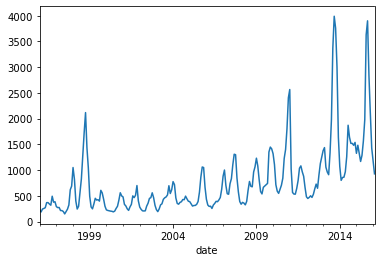

In [237]:
train.plot();

### Average Modal price for each month in MUMBAI

In [238]:
monthly_mod_price=df[["month","priceMod","city"]]

In [239]:
monthly_mod_price=monthly_mod_price[monthly_mod_price["city"]=="MUMBAI"].groupby("month").mean()

In [240]:
monthly_mod_price

,priceMod
month,
April,631.583333
August,1427.416667
December,1318.833333
February,865.000000
January,1091.153846
July,1048.166667
June,884.583333
March,674.333333
May,679.666667


### Time Series Analysis

The null hypothesis of the ADF test is that the time series is non-stationary. So, if the p-value of the test is less than the significance level (0.05) then you reject the null hypothesis and infer that the time series is indeed stationary

In [241]:
from statsmodels.tsa.stattools import adfuller

In [242]:
adfuller(train)
#Our data is not stationary because p-value is 0.507

(-1.5529565759212174,
 0.5071710159736892,
 13,
 228,
 {'1%': -3.4593607492757554,
  '5%': -2.8743015807562924,
  '10%': -2.5735714042782396},
 3117.0423350738133)

In [243]:
train_diff=train.diff().dropna()

In [244]:
adfuller(train_diff)
#After first order differentiating now p value less than 0.05 shows our data is stationary 

(-5.2872869941639555,
 5.81762786323471e-06,
 12,
 228,
 {'1%': -3.4593607492757554,
  '5%': -2.8743015807562924,
  '10%': -2.5735714042782396},
 3105.017292925948)

In [245]:
from statsmodels.tsa.seasonal import seasonal_decompose

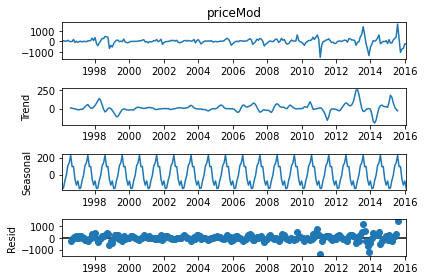

In [246]:
seasonal_decompose(train_diff).plot()
plt.show()

## Acf and Pacf Plots

In [247]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

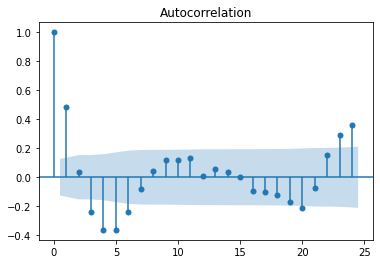

In [248]:
plot_acf(train_diff)
plt.show()

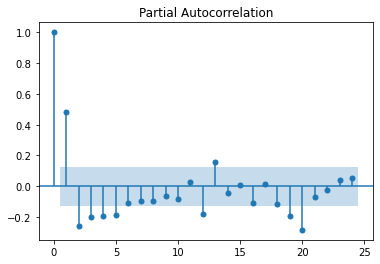

In [249]:
plot_pacf(train_diff)
plt.show()

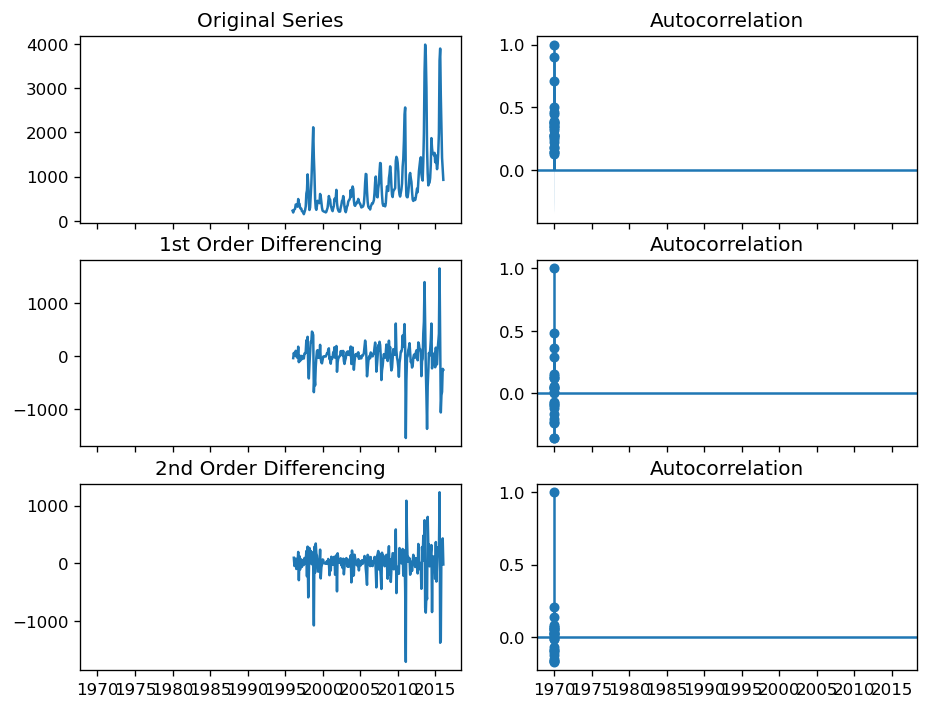

In [250]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Import data
df = train.copy()

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df); axes[0, 0].set_title('Original Series')
plot_acf(df, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

## Auto Arima Model

In [251]:
from pmdarima import auto_arima

In [252]:
arimamodel=auto_arima(train)

In [253]:
print(arimamodel) #Non Seasonal Data

 ARIMA(2,1,1)(0,0,0)[0] intercept


In [254]:
arimamodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  242
Model:               SARIMAX(2, 1, 1)   Log Likelihood               -1647.621
Date:                Sat, 18 Dec 2021   AIC                           3305.243
Time:                        20:11:04   BIC                           3322.667
Sample:                             0   HQIC                          3312.262
                                - 242                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.6334      1.261      1.295      0.195      -0.838       4.105
ar.L1          1.3405      0.041     32.755      0.000       1.260       1.421
ar.L2         -0.6167      0.037    -16.628      0.000      -0.689      -0.544
ma.L1         -0.9529      0.032    -29.329      0.000      -1.017      -0.889
sigma2      5.038e+04   2051.089     24.561      0.000    4.64e+04    5.44e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              2212.07
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               4.96   Skew:                             1.22
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

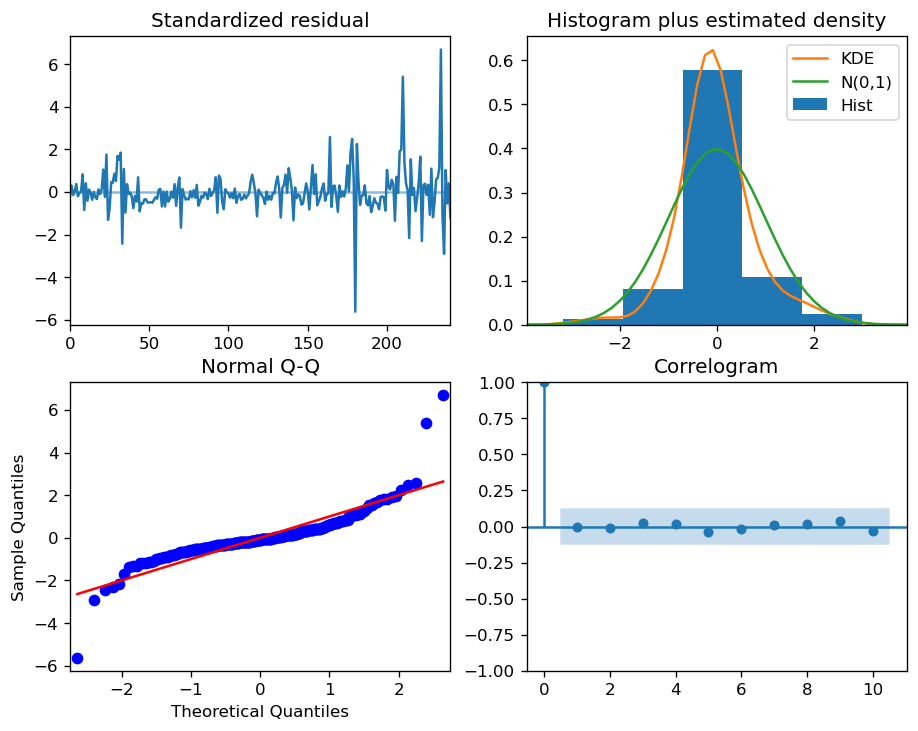

In [255]:
arimamodel.plot_diagnostics()
plt.show()

In [256]:
arimaforecast=arimamodel.predict(n_periods=20)

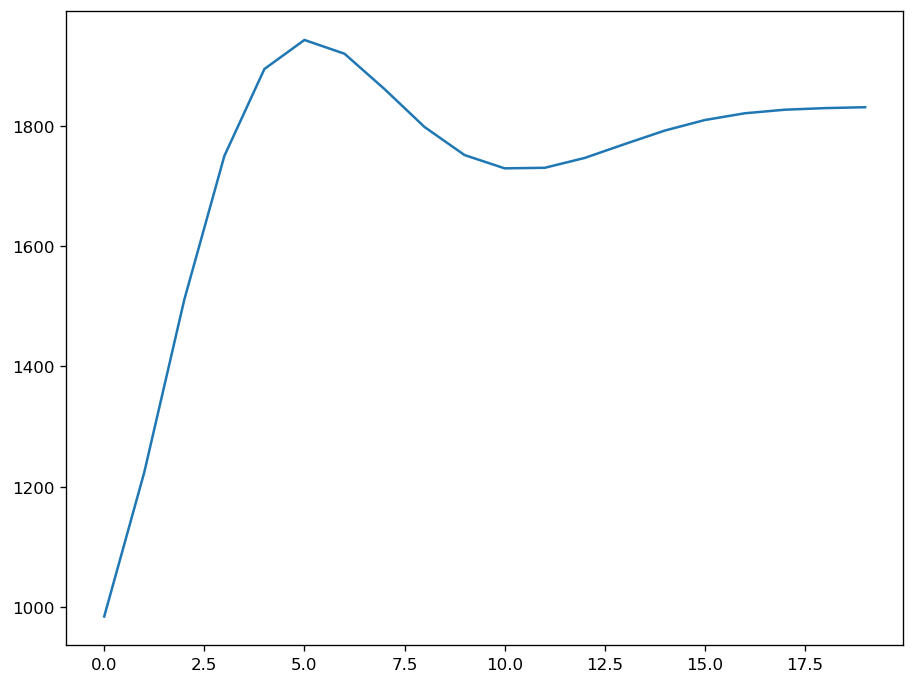

In [257]:
plt.plot(arimaforecast)

In [258]:
forecast = arimamodel.predict(n_periods=len(train))
forecast = pd.DataFrame(forecast,index = train.index,columns=['Prediction'])

In [259]:
from sklearn.metrics import mean_squared_error

In [260]:
rmse=np.sqrt(mean_squared_error(forecast,train))

In [261]:
print(rmse)

1740.686133878443


## Holt Winters Smoothing

In [262]:
import warnings
warnings.filterwarnings("ignore")

In [263]:
# holt winters 
# single exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HWES

In [264]:
model = HWES(train, seasonal_periods=12, trend='add', seasonal='mul')
fitted = model.fit()

In [265]:
fitted.summary()

Dep. Variable:,priceMod,No. Observations:,242
Model:,ExponentialSmoothing,SSE,16413862.331
Optimized:,True,AIC,2724.177
Trend:,Additive,BIC,2780.000
Seasonal:,Multiplicative,AICC,2727.244
Seasonal Periods:,12,Date:,"Sat, 18 Dec 2021"
Box-Cox:,False,Time:,20:11:07
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.8889276,alpha,True
smoothing_trend,0.0001011,beta,True


In [266]:
predict=fitted.forecast(steps=12)

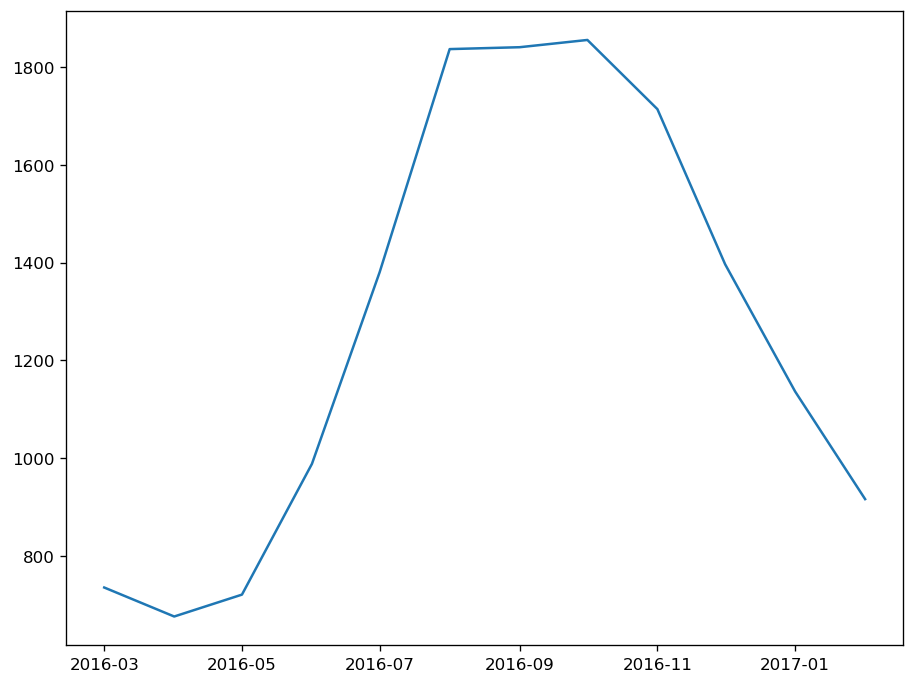

In [267]:
plt.plot(predict)

In [268]:
forecast

,Prediction
date,
1996-01-01,984.237906
1996-02-01,1223.888028
1996-03-01,1511.066382
1996-04-01,1749.864248
1996-05-01,1894.497774
...,...
2015-10-01,3115.861186
2015-11-01,3121.774611
2015-12-01,3127.688035


In [269]:
forecast

,Prediction
date,
1996-01-01,984.237906
1996-02-01,1223.888028
1996-03-01,1511.066382
1996-04-01,1749.864248
1996-05-01,1894.497774
...,...
2015-10-01,3115.861186
2015-11-01,3121.774611
2015-12-01,3127.688035


In [270]:
forecast = fitted.predict(start="1996-01-01",end="2016-02-01")

In [271]:
rmse=np.sqrt(mean_squared_error(forecast,train))
print(rmse)

260.4340173652081


In [272]:
#Rmse of Holt Winter Exponential smoothing model is low so this is the best model for forcasting.